In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df=pd.read_csv('empires.csv', sep=',',header=None)

In [16]:
df.head()

,0,1,2
0,Empire,Million km2,Year
1,British Empire,35.5,1920
2,Mongol Empire,24,1270
3,Russian Empire,22.8,1895
4,Qing dynasty,14.7,1790


In [17]:
df.rename(columns={0: "names", 1: "sizes", 2:"years"})

,names,sizes,years
0,Empire,Million km2,Year
1,British Empire,35.5,1920
2,Mongol Empire,24,1270
3,Russian Empire,22.8,1895
4,Qing dynasty,14.7,1790
...,...,...,...
162,Neo-Sumerian Empire,0.1,-2000
163,Larsa,0.1,1750
164,Tarascan empire,0.08,1450
165,Sumer,0.05,-2400


In [38]:
data = df.iloc[1:]
names = data[0]
sizes = data[1].astype(float)
years = data[2].astype(int)
index = np.arange(start=1, stop=sizes.count()+1, step=1)

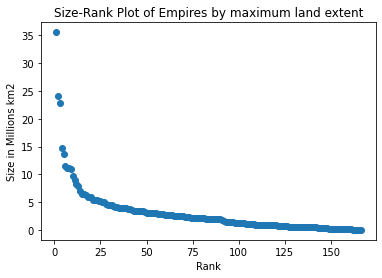

In [39]:
plt.plot(index, sizes, 'o')
plt.title('Size-Rank Plot of Empires by maximum land extent')
plt.xlabel('Rank')
plt.ylabel('Size in Millions km2')
plt.savefig('empires.png')

In [42]:
logindex= np.log(index)
logsize = np.log(sizes*1000) #units now in thousands km^2

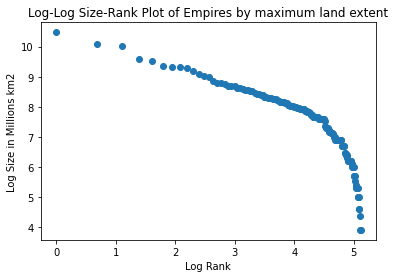

In [43]:
plt.plot(logindex, logsize, 'o')
plt.title('Log-Log Size-Rank Plot of Empires by maximum land extent')
plt.xlabel('Log Rank')
plt.ylabel('Log Size in Millions km2')
plt.savefig('empires_log.png')

In [46]:
logsize[75] #estimate of cutoff for linear region

7.673223121121708

In [54]:
powerlaw_logsize = logsize[0:75]
powerlaw_logindex = logindex[0:75]

In [55]:
coeffs = np.polyfit(powerlaw_logindex,powerlaw_logsize,deg=1)

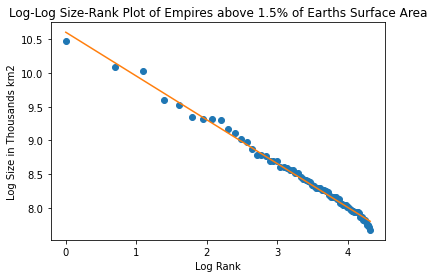

In [56]:
plt.plot(powerlaw_logindex, powerlaw_logsize, 'o')
plt.plot(powerlaw_logindex, coeffs[0]*powerlaw_logindex + coeffs[1])
plt.title('Log-Log Size-Rank Plot of Empires above 1.5% of Earths Surface Area')
plt.xlabel('Log Rank')
plt.ylabel('Log Size in Thousands km2')
plt.savefig('power_law_top_empires.png')

In [57]:
coeffs[0] #note this implies super Zipfian behavior as the power is < 1

-0.6495203704285825

In [58]:
small_logindex = logindex[75:]
small_logsize = logsize[75:]

In [59]:
small_coeffs = np.polyfit(small_logindex, np.exp(small_logsize), deg=1)

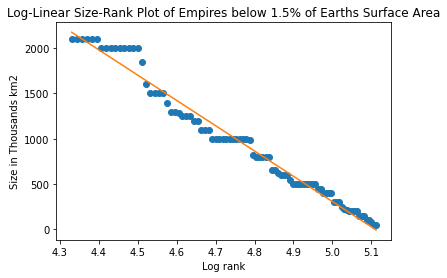

In [60]:
plt.plot(small_logindex, np.exp(small_logsize), 'o')
plt.plot(small_logindex, small_coeffs[0]*small_logindex+small_coeffs[1])
plt.title('Log-Linear Size-Rank Plot of Empires below 1.5% of Earths Surface Area')
plt.xlabel('Log rank')
plt.ylabel('Size in Thousands km2')
plt.savefig('exp_law_bottom_empires.png')

In [63]:
big_empires_average_year = years[0:75].mean()
print(big_empires_average_year)
small_empires_average_year = years[75:].mean()
print(small_empires_average_year)

908.5333333333333
187.71428571428572


In [79]:
r2 = np.corrcoef(sizes,years)
print(r2) #not exceptionally strong correlation but its there

[[1.         0.34232845]
 [0.34232845 1.        ]]


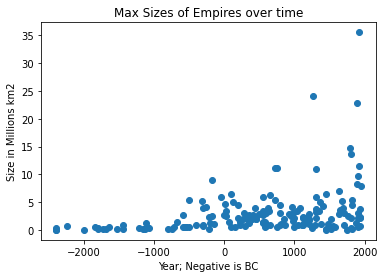

In [82]:
plt.plot(years, sizes, 'o')
plt.title('Max Sizes of Empires over time')
plt.xlabel("Year; Negative is BC")
plt.ylabel("Size in Millions km2")
plt.savefig('size_over_time.png')

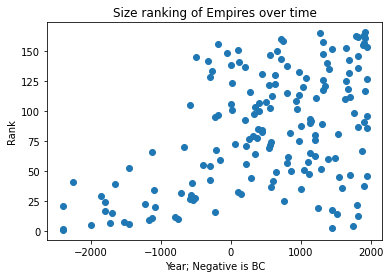

In [83]:
plt.plot(years, np.flip(index), 'o')
plt.title('Size ranking of Empires over time')
plt.xlabel("Year; Negative is BC")
plt.ylabel("Rank")
plt.savefig('Rank_over_time.png')